## Pré Processamento de Dados

In [1]:
import pandas as pd
import os

In [103]:
current_dir = os.getcwd()
print(f"Diretório de trabalho atual: {current_dir}")

caminho_relativo = r'..\..\data\Airlines.csv'

if os.path.exists(caminho_relativo):
    dados = pd.read_csv(caminho_relativo, index_col='id')
    print(dados.head())
else:
    print(f"Arquivo não encontrado: {caminho_relativo}")

Diretório de trabalho atual: c:\Users\herbe\Desktop\JaPodeVoar\app\models
   Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
id                                                                      
1       CO     269         SFO       IAH          3    15     205      1
2       US    1558         PHX       CLT          3    15     222      1
3       AA    2400         LAX       DFW          3    20     165      1
4       AA    2466         SFO       DFW          3    20     195      1
5       AS     108         ANC       SEA          3    30     202      0


In [26]:
# Número de linhas e colunas
dados.shape

(539383, 8)

In [27]:
# Verifica a estrutura do dataframe, incluindo a contagem de valores não nulos e os tipos de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539383 entries, 1 to 539383
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Airline      539383 non-null  object
 1   Flight       539383 non-null  int64 
 2   AirportFrom  539383 non-null  object
 3   AirportTo    539383 non-null  object
 4   DayOfWeek    539383 non-null  int64 
 5   Time         539383 non-null  int64 
 6   Length       539383 non-null  int64 
 7   Delay        539383 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 37.0+ MB


In [28]:
# Resumos estatisticos
dados[['Time', 'Length']].describe()

,Time,Length
count,539383.000000,539383.000000
mean,802.728963,132.202007
std,278.045911,70.117016
min,10.000000,0.000000
25%,565.000000,81.000000
50%,795.000000,115.000000
75%,1035.000000,162.000000
max,1439.000000,655.000000


In [30]:
def zero_length(dados):
  zero_length = dados[dados['Length'] == 0]
  if not zero_length.empty:
    print("A coluna Length contém valores iguais a zero:")
    print(zero_length)
  else:
    print("A coluna Length não contém valores iguais a zero.")


zero_length(dados)

A coluna Length contém valores iguais a zero:
       Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
id                                                                          
179150      F9     106         DEN       MSP          6   635       0      0
182841      F9     107         MSP       DEN          6   851       0      0
188954      F9     103         MSP       DEN          7   375       0      0
445579      B6     493         BOS       SEA          7  1060       0      1


In [31]:
# Remove os valores zero da coluna Length antes de remover os outliers
dados_no_zero = dados[dados['Length'] != 0]

# Calcula o primeiro quartil (Q1) e o terceiro quartil (Q3)
Q1 = dados_no_zero['Length'].quantile(0.25)
Q3 = dados_no_zero['Length'].quantile(0.75)

# Calcula o intervalo interquartil (IQR)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtra os dados removendo os outliers
dados_cleaned = dados_no_zero[(dados_no_zero['Length'] >= lower_bound) & (dados_no_zero['Length'] <= upper_bound)]

zero_length(dados_cleaned)


A coluna Length não contém valores iguais a zero.


In [32]:
# Verifique o min novamente
dados = dados_cleaned
dados[['Length']].describe()

,Length
count,513729.000000
mean,121.919090
std,53.302743
min,23.000000
25%,80.000000
50%,111.000000
75%,155.000000
max,283.000000


In [33]:
# Exibe os tipos de dados de cada coluna
dados.dtypes

Airline        object
Flight          int64
AirportFrom    object
AirportTo      object
DayOfWeek       int64
Time            int64
Length          int64
Delay           int64
dtype: object

In [34]:
# Verifica a quantidade de valores nulos por coluna
dados.isnull().sum()

Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [35]:
# Verifica se há linhas duplicadas
duplicatas = dados.duplicated()

# Exibe as linhas duplicadas (se houver)
if duplicatas.any():
    print("Há dados redundantes (linhas duplicadas):")
    print(dados[duplicatas])

    # Limpeza de dados Redundantes
    dados.drop_duplicates(inplace=True)

else:
    print("Não há dados redundantes (linhas duplicadas).")

Há dados redundantes (linhas duplicadas):
       Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
id                                                                          
120389      CO     269         SFO       IAH          3    15     205      1
120393      AS     108         ANC       SEA          3    30     202      0
120394      CO    1094         LAX       IAH          3    30     181      1
120398      DL    2055         SLC       ATL          3    50     210      0
120400      AS     132         ANC       PDX          3    55     215      0
...        ...     ...         ...       ...        ...   ...     ...    ...
539371      AA    1488         DEN       MIA          5  1435     220      1
539372      AA    1522         SFO       ORD          5  1435     240      0
539376      FL      58         LAX       ATL          5  1435     250      0
539377      B6     717         JFK       SJU          5  1439     220      1
539381      FL     609         SFO

C:\Users\herbe\AppData\Local\Temp\ipykernel_13732\4121769074.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.drop_duplicates(inplace=True)


In [36]:
dados['Delay'].unique()

array([1, 0])

In [37]:
dados['Airline'].unique()

array(['CO', 'US', 'AA', 'AS', 'DL', 'B6', 'HA', 'OO', '9E', 'OH', 'EV',
       'XE', 'YV', 'UA', 'MQ', 'FL', 'F9', 'WN'], dtype=object)

In [ ]:
dados['AirportFrom'].unique()

array(['SFO', 'PHX', 'LAX', 'ANC', 'LAS', 'SLC', 'DEN', 'ONT', 'FAI',
       'BQN', 'PSE', 'HNL', 'BIS', 'IYK', 'EWR', 'BOS', 'MKE', 'GFK',
       'OMA', 'GSO', 'LMT', 'SEA', 'MCO', 'TPA', 'DLH', 'MSP', 'FAR',
       'MFE', 'MSY', 'VPS', 'BWI', 'MAF', 'LWS', 'RST', 'ALB', 'DSM',
       'CHS', 'MSN', 'JAX', 'SAT', 'PNS', 'BHM', 'LIT', 'SAV', 'BNA',
       'ICT', 'ECP', 'DHN', 'MGM', 'CAE', 'PWM', 'ACV', 'EKO', 'PHL',
       'ATL', 'PDX', 'RIC', 'BTR', 'HRL', 'MYR', 'TUS', 'SBN', 'CAK',
       'TVC', 'CLE', 'ORD', 'DAY', 'MFR', 'BTV', 'TLH', 'TYS', 'DFW',
       'FLL', 'AUS', 'CHA', 'CMH', 'LRD', 'BRO', 'CRP', 'LAN', 'PVD',
       'FWA', 'JFK', 'LGA', 'OKC', 'PIT', 'PBI', 'ORF', 'DCA', 'AEX',
       'SYR', 'SHV', 'VLD', 'BDL', 'FAT', 'BZN', 'RDM', 'LFT', 'IPL',
       'EAU', 'ERI', 'BUF', 'IAH', 'MCI', 'AGS', 'ABI', 'GRR', 'LBB',
       'CLT', 'LEX', 'MBS', 'MOD', 'AMA', 'SGF', 'AZO', 'ABE', 'SWF',
       'BGM', 'AVP', 'FNT', 'GSP', 'ATW', 'ITH', 'TUL', 'COS', 'ELP',
       'ABQ', 'SMF',

In [38]:
print("Quantidade de companhias aéreas distintas:", len(dados['Airline'].unique()))
print("Quantidade de modelos de aviões distintos:", len(dados['Flight'].unique()))
print("Quantidade de aeroportos distintos (origem):", len(dados['AirportFrom'].unique()))
print("Quantidade de aeroportos distintos (destino):", len(dados['AirportTo'].unique()))
print("Quantidade total de voos:", len(dados))


Quantidade de companhias aéreas distintas: 18
Quantidade de modelos de aviões distintos: 6585
Quantidade de aeroportos distintos (origem): 292
Quantidade de aeroportos distintos (destino): 292
Quantidade total de voos: 308084


In [39]:
# Verificar balanceamento de classe
for col in ['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length', 'Delay']:
  print(f"Value counts for {col}:")
  print(dados[col].value_counts())
  print("\n")

Value counts for Airline:
Airline
WN    57412
DL    36960
OO    35207
XE    20961
EV    19135
AA    17553
MQ    16826
US    16200
UA    15649
9E    13944
FL    13194
CO    12233
OH     8174
B6     7457
YV     7424
AS     4989
F9     2978
HA     1788
Name: count, dtype: int64


Value counts for Flight:
Flight
9       204
5       185
62      182
16      182
151     178
       ... 
3385      1
5606      1
3349      1
3184      1
3413      1
Name: count, Length: 6585, dtype: int64


Value counts for AirportFrom:
AirportFrom
ATL    21952
ORD    14681
DEN    12764
DFW    10325
IAH     9993
       ...  
BLI       11
SJT       10
MMH       10
ADK        4
ABR        2
Name: count, Length: 292, dtype: int64


Value counts for AirportTo:
AirportTo
ATL    21923
ORD    14549
DEN    12606
IAH     9921
DFW     9706
       ...  
BLI       10
MMH       10
PIE        9
ABR        2
ADK        2
Name: count, Length: 292, dtype: int64


Value counts for DayOfWeek:
DayOfWeek
5    49269
4    47189
3    466

In [40]:
# classes majoritária e minoritária
class_maj = dados[dados['Delay'] == 0]
class_min = dados[dados['Delay'] == 1]

class_maj_subamostrada = class_maj.sample(len(class_min), random_state=42)

dados_balanceados = pd.concat([class_maj_subamostrada, class_min])

dados_balanceados = dados_balanceados.sample(frac=1, random_state=42).reset_index(drop=True)

dados_balanceados['Delay'].value_counts()

Delay
0    147370
1    147370
Name: count, dtype: int64

In [39]:
dados_balanceados.shape

(294740, 8)

# Vizualizações graficas dos dados


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

## Numero de voos por Companhias aéreas





<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\herbe\AppData\Local\Temp\ipykernel_13732\3521049138.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.savefig('..\static\image\graficos\Vooscompanhias.png')


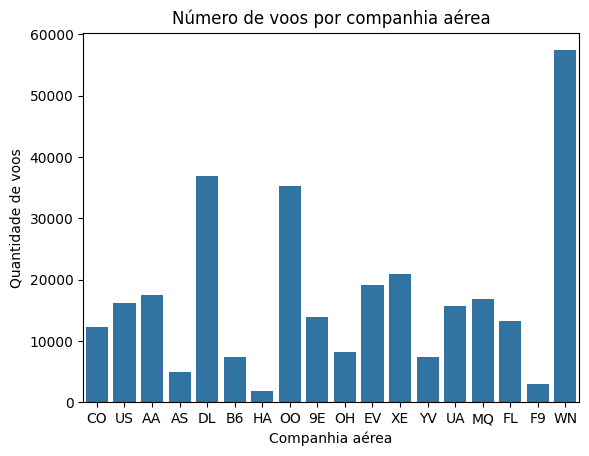

In [88]:
# Companhias aéreas
sns.countplot(x='Airline', data=dados)
plt.xlabel('Companhia aérea')
plt.ylabel('Quantidade de voos')
plt.title('Número de voos por companhia aérea')
plt.savefig('..\static\image\graficos\Vooscompanhias.png')
plt.show()



## Número de voos por dia da semana


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\herbe\AppData\Local\Temp\ipykernel_13732\659446494.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.savefig('..\static\image\graficos\Voossemana.png')


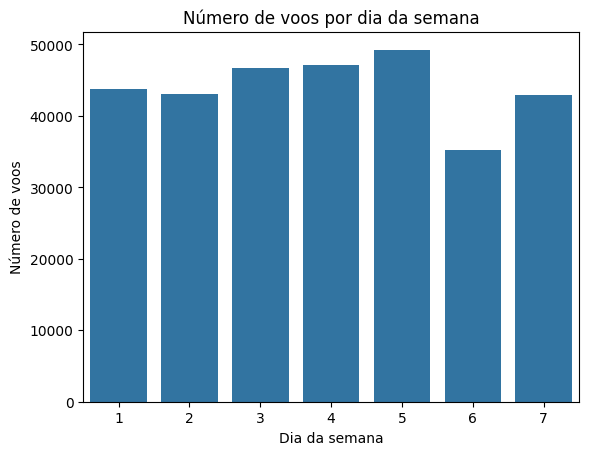

In [89]:
# Número de voos por dia da semana
sns.countplot(data=dados, x='DayOfWeek')
plt.title('Número de voos por dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Número de voos')
plt.savefig('..\static\image\graficos\Voossemana.png')
plt.show()


## Quantidade de atraso de voos

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\herbe\AppData\Local\Temp\ipykernel_13732\4191557567.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.savefig('..\static\image\graficos\Voosatrasados.png')


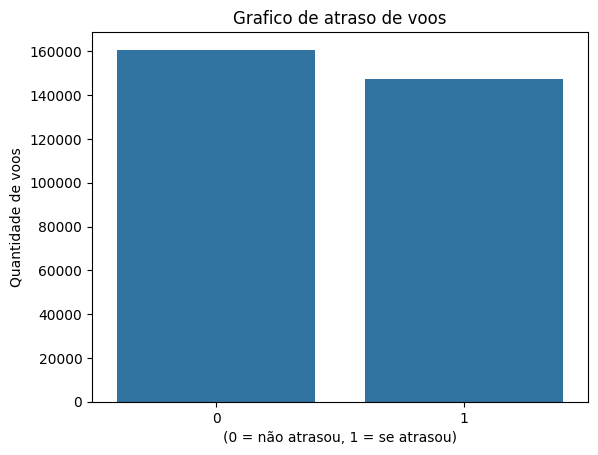

Quantidade de voos que se atrasaram: 147370


In [90]:
# Quantidade de atrasos
sns.countplot(x = 'Delay', data = dados)
plt.title('Grafico de atraso de voos')
plt.xlabel('(0 = não atrasou, 1 = se atrasou)')
plt.ylabel('Quantidade de voos')
plt.savefig('..\static\image\graficos\Voosatrasados.png')
plt.show()

quantidade_atrasos = dados[dados['Delay'] == 1].shape[0]
print(f"Quantidade de voos que se atrasaram: {quantidade_atrasos}")


## Atraso por Companhia Aérea (Delay vs Airline)




<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
C:\Users\herbe\AppData\Local\Temp\ipykernel_13732\374709590.py:16: SyntaxWarning: invalid escape sequence '\s'
  plt.savefig('..\static\image\graficos\Atrasoscompanhia.png')


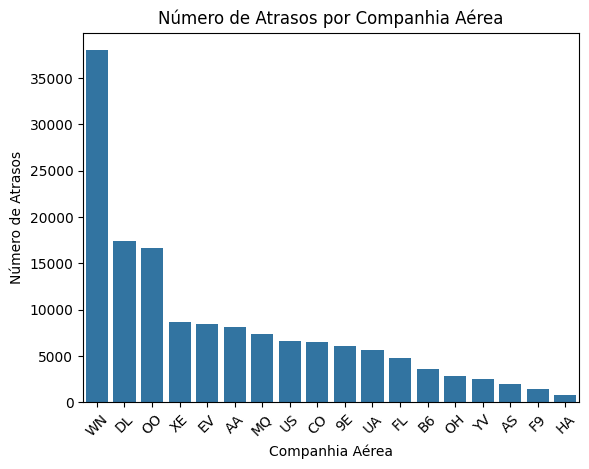

Companhia aérea com mais atrasos: WN com 38003 atrasos.


In [91]:
# Filtra os dados para incluir apenas os voos atrasados
atrasos = dados[dados['Delay'] == 1]

# Calcula a média de atrasos por companhia aérea
media_atrasos = atrasos['Airline'].value_counts().reset_index()
media_atrasos.columns = ['Airline', 'Number of Delays']

# Encontra a companhia aérea com mais atrasos
companhia_mais_atrasada = media_atrasos.loc[media_atrasos['Number of Delays'].idxmax()]

sns.barplot(x='Airline', y='Number of Delays', data=media_atrasos)
plt.title('Número de Atrasos por Companhia Aérea')
plt.xlabel('Companhia Aérea')
plt.ylabel('Número de Atrasos')
plt.xticks(rotation=45)
plt.savefig('..\static\image\graficos\Atrasoscompanhia.png')
plt.show()

# Mostra a companhia aérea que mais se atrasou
print(f"Companhia aérea com mais atrasos: {companhia_mais_atrasada['Airline']} com {companhia_mais_atrasada['Number of Delays']} atrasos.")


## Voos Atrasados por Dia da Semana (Delay vs DayOfWeek)


<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
C:\Users\herbe\AppData\Local\Temp\ipykernel_13732\2569936024.py:27: SyntaxWarning: invalid escape sequence '\s'
  plt.savefig('..\static\image\graficos\Voosatrasadossemana.png')


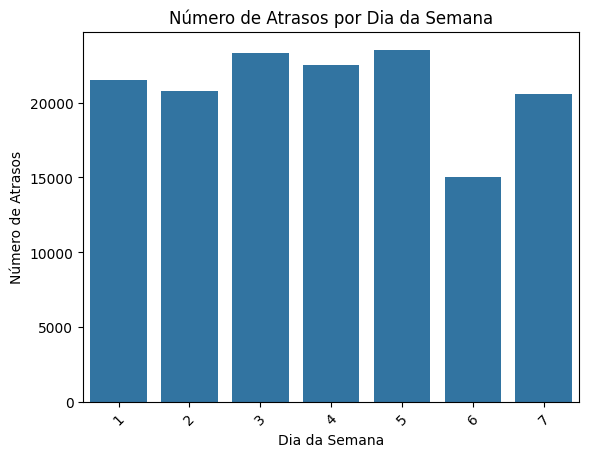

Dia da semana com mais atrasos: Quinta com 23559 atrasos.


In [92]:
# Filtra os dados para incluir apenas os voos atrasados
atrasos = dados[dados['Delay'] == 1]

# Calcula o número de atrasos por dia da semana
media_atrasos = atrasos['DayOfWeek'].value_counts().reset_index()
media_atrasos.columns = ['DayOfWeek', 'NumberDelays']

# Encontra o dia da semana com mais atrasos
dia_mais_atrasado = media_atrasos.loc[media_atrasos['NumberDelays'].idxmax()]

# Dicionário para mapear números para nomes dos dias
dias_da_semana = {
    1: "Domingo",
    2: "Segunda",
    3: "Terça",
    4: "Quarta",
    5: "Quinta",
    6: "Sexta",
    7: "Sábado"
}

sns.barplot(x='DayOfWeek', y='NumberDelays', data=media_atrasos)
plt.title('Número de Atrasos por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Atrasos')
plt.xticks(rotation=45)
plt.savefig('..\static\image\graficos\Voosatrasadossemana.png')
plt.show()

# Mostra o dia da semana com mais atrasos usando o dicionário
dia_nome = dias_da_semana[dia_mais_atrasado['DayOfWeek']]
print(f"Dia da semana com mais atrasos: {dia_nome} com {dia_mais_atrasado['NumberDelays']} atrasos.")


## Duração do Voo por Companhia Aérea (Flight Length vs Airline):



<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\herbe\AppData\Local\Temp\ipykernel_13732\3045878419.py:9: SyntaxWarning: invalid escape sequence '\s'
  plt.savefig('..\static\image\graficos\Duracaovooporcompanhia.png')


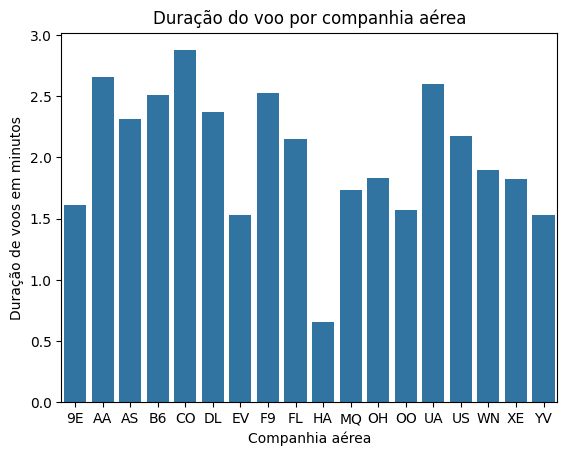

Companhia aérea: 9E, Duração média do voo: 1 horas e 36 minutos.
Companhia aérea: AA, Duração média do voo: 2 horas e 39 minutos.
Companhia aérea: AS, Duração média do voo: 2 horas e 18 minutos.
Companhia aérea: B6, Duração média do voo: 2 horas e 30 minutos.
Companhia aérea: CO, Duração média do voo: 2 horas e 52 minutos.
Companhia aérea: DL, Duração média do voo: 2 horas e 22 minutos.
Companhia aérea: EV, Duração média do voo: 1 horas e 31 minutos.
Companhia aérea: F9, Duração média do voo: 2 horas e 31 minutos.
Companhia aérea: FL, Duração média do voo: 2 horas e 8 minutos.
Companhia aérea: HA, Duração média do voo: 0 horas e 39 minutos.
Companhia aérea: MQ, Duração média do voo: 1 horas e 43 minutos.
Companhia aérea: OH, Duração média do voo: 1 horas e 49 minutos.
Companhia aérea: OO, Duração média do voo: 1 horas e 34 minutos.
Companhia aérea: UA, Duração média do voo: 2 horas e 35 minutos.
Companhia aérea: US, Duração média do voo: 2 horas e 10 minutos.
Companhia aérea: WN, Duraç

In [93]:
# Duração em horas
dados_balanceados['Length_horas'] = dados_balanceados['Length'] / 60

average_delay = dados_balanceados.groupby('Airline')['Length_horas'].mean().reset_index()
sns.barplot(x='Airline', y='Length_horas', data=average_delay)
plt.title('Duração do voo por companhia aérea')
plt.xlabel('Companhia aérea')
plt.ylabel('Duração de voos em minutos')
plt.savefig('..\static\image\graficos\Duracaovooporcompanhia.png')
plt.show()
for index, row in average_delay.iterrows():
    horas_inteiras = int(row['Length_horas'])
    minutos = int((row['Length_horas'] - horas_inteiras) * 60)
    print(f"Companhia aérea: {row['Airline']}, Duração média do voo: {horas_inteiras} horas e {minutos} minutos.")


<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\herbe\AppData\Local\Temp\ipykernel_13732\1652921240.py:8: SyntaxWarning: invalid escape sequence '\s'
  plt.savefig('..\static\image\graficos\Heartmap.png')


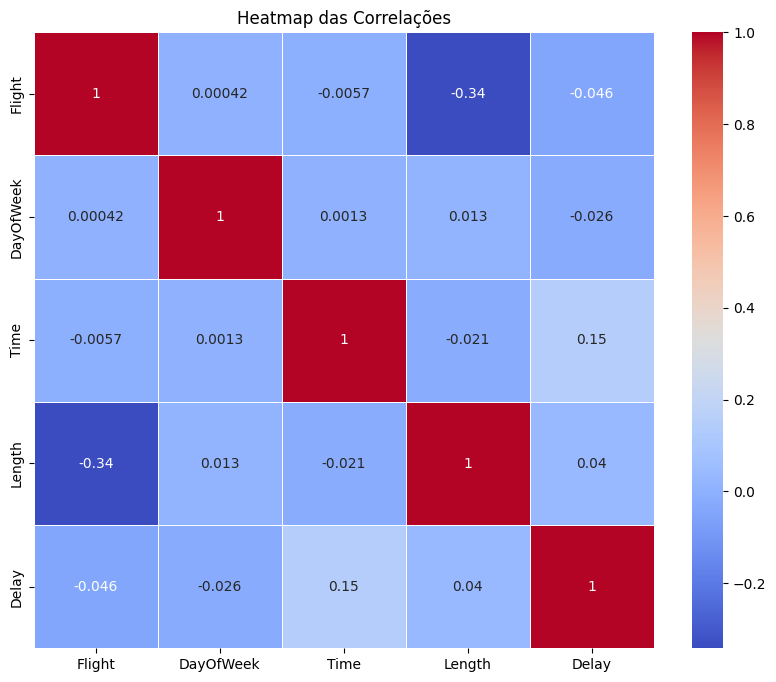

In [105]:
dados_numericos = dados.select_dtypes(include=[np.number])

matriz_correlacao = dados_numericos.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap das Correlações')
plt.savefig('..\static\image\graficos\Heartmap.png')
plt.show()